In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import PIL.Image as Image


# load the previous section .npz file with high level features

In [2]:
with np.load('images_data.npz', allow_pickle=True) as npz_file:
    print(list(npz_file.keys()))
    print('features:', npz_file['columns'])   
    df = pd.DataFrame(npz_file['values'], columns= npz_file['columns'])

print(df.shape)
df.head()

['values', 'columns']
features: ['feature_0' 'feature_1' 'feature_2' ... 'category' 'imageFileName'
 'imageSet']
(469, 1283)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_1273,feature_1274,feature_1275,feature_1276,feature_1277,feature_1278,feature_1279,category,imageFileName,imageSet
0,0.25406912,0.2954484,0.20744172,0.08165594,0.783802,0.0,0.0,0.0,0.0,0.0,...,0.0,0.31076047,0.0,0.40937895,0.0,0.0,0.3175574,bike,./swissroads/test/bike\bike-0100.png,test
1,0.24364164,0.09553307,7.6994525e-05,0.07163166,2.5369465,0.20493577,0.10374464,0.0,0.0,0.0,...,0.0,0.0,0.0,0.42038777,0.0,0.0,1.3034639,bike,./swissroads/test/bike\bike-0101.png,test
2,0.11059619,0.3829782,0.046626978,0.03335224,0.6243066,0.0,0.0,0.03965578,0.0026035465,0.0,...,0.0054156817,1.1835611,0.0,0.14194335,0.0,0.0,1.646229,bike,./swissroads/test/bike\bike-0102.png,test
3,0.1630335,0.01665815,0.059991173,0.0052932478,0.49764434,0.13886422,0.0,0.13545506,0.0,0.0,...,0.13694933,0.28324947,0.00072034256,0.13651899,0.0,0.5265473,1.1367807,bike,./swissroads/test/bike\bike-0103.png,test
4,0.0,0.098676436,0.0,0.5445995,1.3952099,0.0,0.0,0.0,0.035832644,0.0,...,0.0,0.08434142,0.0,0.0,0.0,0.0,2.4986827,bike,./swissroads/test/bike\bike-0104.png,test


# plot images from valid dataset

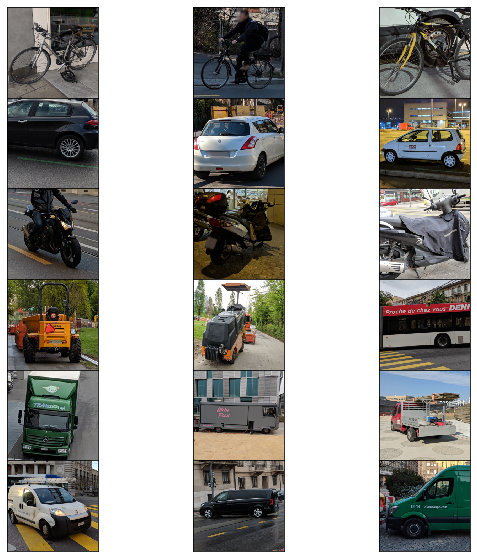

In [4]:
# plot some images of each categories from test dataset
categories = ['bike', 'car', 'motorcycle','other','truck','van']
df_test = df[df['imageSet'] == 'test']

# Create a grid of subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(10, 10))

# Remove gaps between suplots
plt.subplots_adjust(wspace=0, hspace=0)    

for i in range(len(categories)):
    df2 = df_test[df_test['category'] == categories[i]]
    for j in range(3):
        axis = axes.flatten()[3*i+j]
        img = Image.open(df2['imageFileName'].iloc[j]) 

        axis.imshow(img)
        axis.get_xaxis().set_visible(False)
        axis.get_yaxis().set_visible(False)
    
plt.show()
    

- we get 3 image samples from our 6 different categpries

# let's apply a Principal component analysis to evidence main components
- scale the data
- apply a PCA with 2 components on train dataset


In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_train = df[df['imageSet'] == 'train']
X_tr = df_train.drop(['imageSet','category','imageFileName'], axis=1).values
y_tr = df_train.category.values

scaler = StandardScaler()
X_tr_rescaled = scaler.fit_transform(X_tr)

pca = PCA(n_components=2)
pca.fit(X_tr_rescaled, y_tr)
X_2d = pca.transform(X_tr_rescaled)


C:\Users\lmbhoc2\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\lmbhoc2\AppData\Local\Continuum\anaconda3\envs\exts-ml\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# let's plot the 2 dimensional representation of our data using the first 2 components

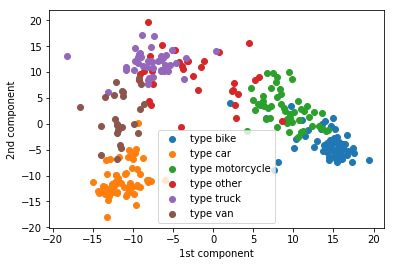

In [10]:
# Plot each category
for cat in categories:
    idx = (y_tr == cat)

    plt.scatter(
        X_2d[idx, 0], X_2d[idx, 1],
        label='type {}'.format(cat)
    )

plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

### what we notice:
- we see clearly 6 clusters representing our 6 categories
- Truck and van category are in the same area when car, bike and motorcycle are clearly grouped differently
- the 'other' category is bright and as 'clearly' regrouped as the other categories

In [11]:
pca.explained_variance_ratio_.sum()

0.1534995894131674

- with 2 components we obtain around 15% of the variance
### let's perform a pca without specifying the amount of components

In [12]:
# Create PCA transformer
pca_all = PCA(n_components=None)

# Apply PCA to rescaled data
pca_all.fit(X_tr_rescaled)

# Proportion of variance explained
pve = pca_all.explained_variance_ratio_
pve.shape

(280,)

- we obtain 280 components when not specifying the components to the PCA
### let's plot the cumulative proportion of variance explained

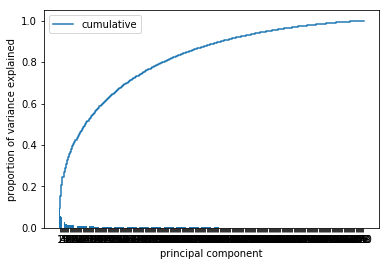

In [13]:
# Create bar plot
xcor = np.arange(1, len(pve) + 1)
plt.bar(xcor, pve)
plt.xticks(xcor)

# Add cumulative sum
pve_cumsum = np.cumsum(pve)
plt.step( xcor+0.5, pve_cumsum,  label='cumulative')

# Add labels
plt.xlabel('principal component')
plt.ylabel('proportion of variance explained')
plt.legend()
plt.show()

In [14]:
for i in range(10, 101, 10):
    print(str(np.where(pve_cumsum > i/100)[0][0]+1) + ' component(s) explain(s) ' + str(i) + '% of the variance')
    

2 component(s) explain(s) 10% of the variance
3 component(s) explain(s) 20% of the variance
7 component(s) explain(s) 30% of the variance
14 component(s) explain(s) 40% of the variance
25 component(s) explain(s) 50% of the variance
41 component(s) explain(s) 60% of the variance
63 component(s) explain(s) 70% of the variance
96 component(s) explain(s) 80% of the variance
150 component(s) explain(s) 90% of the variance
279 component(s) explain(s) 100% of the variance


- 100% of the variance is ontained with 279 components